<B><U>Survival Data Analysis Using the Breast Cancer Wisconsin
(Prognostic) Data Set</U></B>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter
from lifelines import NelsonAalenFitter
from lifelines import CoxPHFitter
from sklearn.model_selection import train_test_split
from lifelines.utils import concordance_index


In [2]:
# To load Cancer's dataset directly from the web-url run this
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wpbc.data'
column_names = [
    'ID', 'Outcome', 'Time', 'radius_mean', 'texture_mean', 'perimeter_mean', 
    'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 
    'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 
    'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 
    'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 
    'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst', 
    'Tumor_Size', 'Lymph_Node_Status'
]
# Load the dataset
data = pd.read_csv(url, header=None, names=column_names)
# data = pd.read_csv('data.csv')
# data=data.drop(columns='Unnamed: 0')

display(data)

,ID,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Tumor_Size,Lymph_Node_Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,943471,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,94547,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,947204,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?


<B>Data Exploration and Preprocessing</B>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       198 non-null    int64  
 1   Outcome                  198 non-null    object 
 2   Time                     198 non-null    int64  
 3   radius_mean              198 non-null    float64
 4   texture_mean             198 non-null    float64
 5   perimeter_mean           198 non-null    float64
 6   area_mean                198 non-null    float64
 7   smoothness_mean          198 non-null    float64
 8   compactness_mean         198 non-null    float64
 9   concavity_mean           198 non-null    float64
 10  concave_points_mean      198 non-null    float64
 11  symmetry_mean            198 non-null    float64
 12  fractal_dimension_mean   198 non-null    float64
 13  radius_se                198 non-null    float64
 14  texture_se               1

In [4]:
data.isnull().sum()

ID                         0
Outcome                    0
Time                       0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Tumor_Size                 0
Lymph_Node_Sta

In [5]:
# upon inspection some data in lymph node status contains '?' character 
data = data[data['Lymph_Node_Status'] != '?']
data.shape

(194, 35)

In [6]:

data.drop(labels='ID',axis=1).describe().round(4).T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
Time,46.9381,34.5236,1.0000,14.2500,39.5000,73.0000,125.0000
radius_mean,17.4023,3.1717,10.9500,15.0525,17.2900,19.5800,27.2200
texture_mean,22.3010,4.3353,10.3800,19.3425,21.7950,24.7825,39.2800
perimeter_mean,114.7815,21.4307,71.9000,98.1600,113.7000,129.6500,182.1000
area_mean,969.0923,353.1600,361.6000,702.5250,929.1000,1193.5000,2250.0000
smoothness_mean,0.1028,0.0126,0.0750,0.0939,0.1022,0.1114,0.1447
compactness_mean,0.1426,0.0502,0.0460,0.1098,0.1318,0.1722,0.3114
concavity_mean,0.1563,0.0709,0.0240,0.1061,0.1521,0.2005,0.4268
concave_points_mean,0.0868,0.0340,0.0203,0.0638,0.0861,0.1039,0.2012
symmetry_mean,0.1929,0.0277,0.1308,0.1741,0.1894,0.2096,0.3040


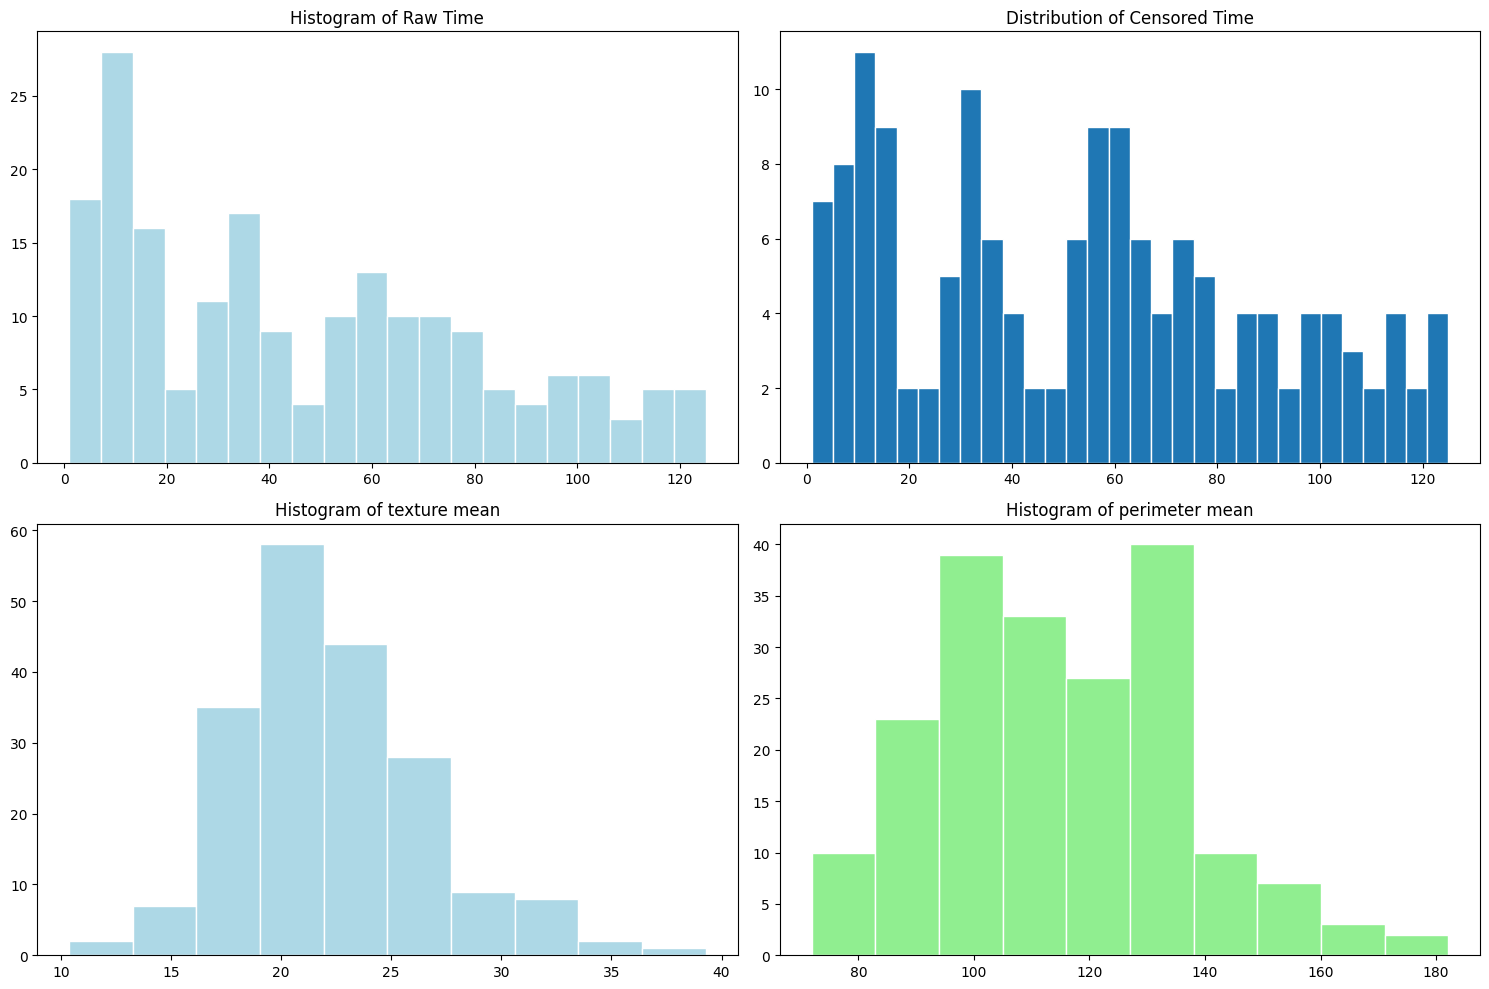

In [7]:
# histogram of Time and radius mean
data['event'] = data['Outcome'].apply(lambda x: 1 if x == 'R' else 0)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes[0,0].hist(data.Time,bins=20,color='lightblue' ,edgecolor='white')
axes[0,0].set_title('Histogram of Raw Time')

#distribution of censorship
axes[0,1].hist(data.loc[data['event'] == 0]['Time'],bins=30,edgecolor='white')
axes[0,1].set_title('Distribution of Censored Time')

axes[1,0].hist(data.texture_mean,color='lightblue' ,edgecolor='white')
axes[1,0].set_title('Histogram of texture mean')

axes[1,1].hist(data.perimeter_mean,color='lightgreen' ,edgecolor='white')
axes[1,1].set_title('Histogram of perimeter mean')

fig.tight_layout()
plt.show()


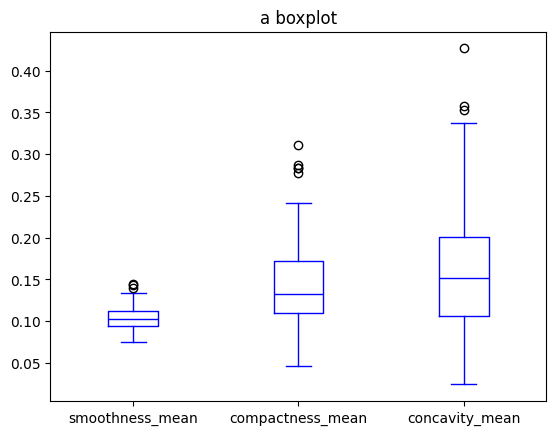

In [8]:
#boxplot of features
ax= data[['smoothness_mean','compactness_mean','concavity_mean']].plot(kind='box',title='a boxplot',color='blue')
plt.show()


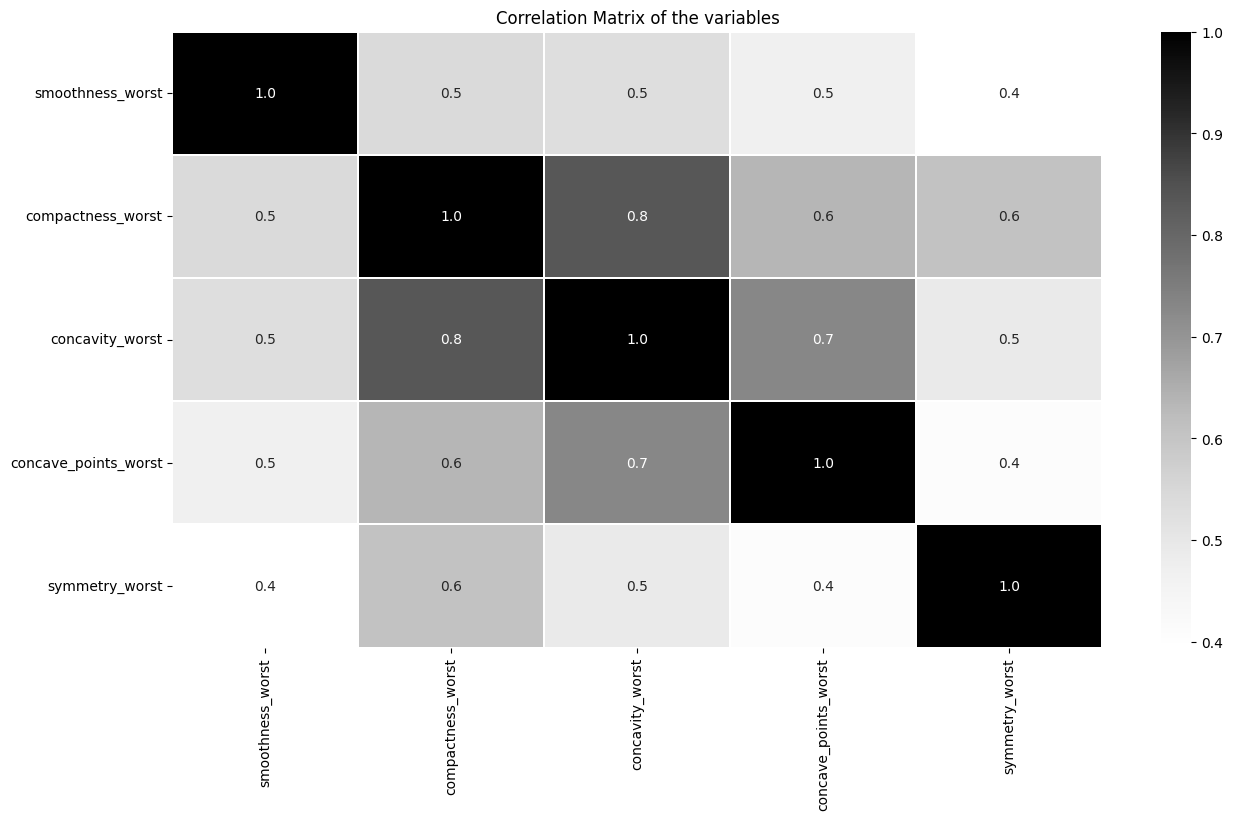

In [9]:
#correlation matrix to understand the relationship between variables
fig,ax=plt.subplots(figsize = (15,8))
sns.heatmap(data.drop(columns=['ID','Outcome']).iloc[:,25:30].corr(),annot= True,linewidths=0.3,fmt = ".1f",ax=ax, cmap='Greys')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of the variables')

plt.show()

<B>NON PARAMETRIC SURVIVAL ANALYSIS<b>

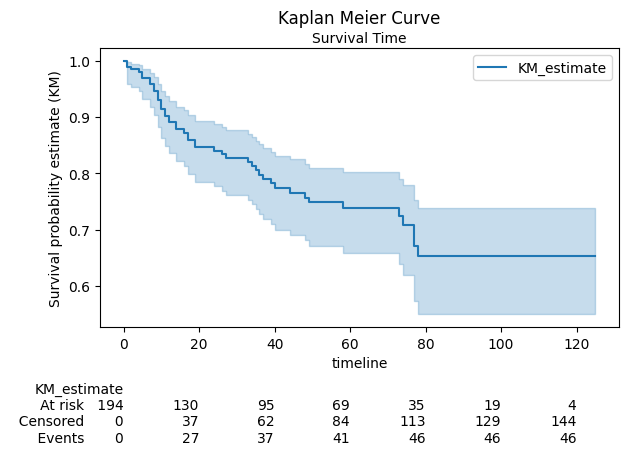

The median survival time is  inf
probability at t is  0.737976942941196
probability at t is  0.6528772013273156


,KM_estimate
timeline,
0.0,1.000000
1.0,0.989691
2.0,0.984482
3.0,0.984482
4.0,0.979217
...,...
116.0,0.652877
117.0,0.652877
119.0,0.652877


In [10]:
#Kaplan Meier Curve

data['event'] = data['Outcome'].apply(lambda x: 1 if x == 'R' else 0)
data=data.drop(columns=['ID','Outcome'],axis=1)


kmf = KaplanMeierFitter()

ax = plt.subplot()

X = data.Time
Y =data.event
kmf.fit(X, event_observed = Y,)
plt.title("Kaplan Meier Curve")
plt.ylabel("Survival probability estimate (KM)")
kmf.plot(ax = ax,at_risk_counts=True)
plt.xlabel("Survival Time")
plt.show()
print('The median survival time is ', kmf.median_survival_time_)
print('probability at t is ', kmf.predict(60))
print('probability at t is ', kmf.predict(80))
kmf.survival_function_
# kmf.event_table



Text(0, 0.5, 'Cummulative Hazard ')

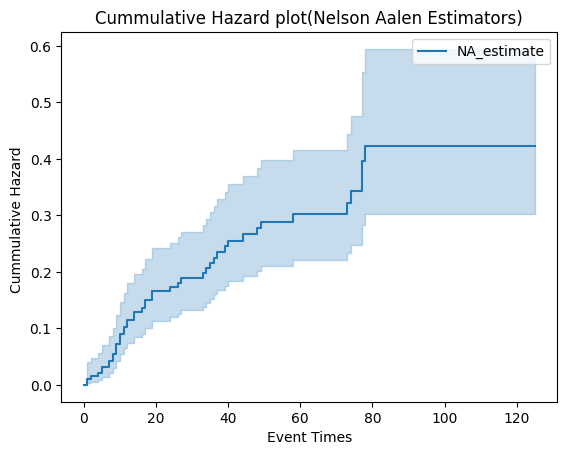

In [11]:
# Nelson aalen
naf=NelsonAalenFitter()
naf.fit(X, event_observed = Y)
naf.plot_cumulative_hazard()
plt.title('Cummulative Hazard plot(Nelson Aalen Estimators)')
plt.xlabel('Event Times')
plt.ylabel('Cummulative Hazard ')

<B>Cox Proportional Hazard Model</B>

c:\Users\gah\AppData\Local\Programs\Python\Python312\Lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['fractal_dimension_mean'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
c:\Users\gah\AppData\Local\Programs\Python\Python312\Lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['smoothness_se'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
c:\Users\gah\AppData\Local\Programs\Python\Python312\Lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['concave_points_se'] have very low variance. This

Selected feature: radius_worst, C-index: 0.7397260273972602


c:\Users\gah\AppData\Local\Programs\Python\Python312\Lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['fractal_dimension_mean'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
c:\Users\gah\AppData\Local\Programs\Python\Python312\Lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['smoothness_se'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
c:\Users\gah\AppData\Local\Programs\Python\Python312\Lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['concave_points_se'] have very low variance. This

Selected feature: symmetry_mean, C-index: 0.7632093933463796


c:\Users\gah\AppData\Local\Programs\Python\Python312\Lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['fractal_dimension_mean'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
c:\Users\gah\AppData\Local\Programs\Python\Python312\Lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['smoothness_se'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
c:\Users\gah\AppData\Local\Programs\Python\Python312\Lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['concave_points_se'] have very low variance. This

Selected feature: smoothness_worst, C-index: 0.7749510763209393


c:\Users\gah\AppData\Local\Programs\Python\Python312\Lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['fractal_dimension_mean'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
c:\Users\gah\AppData\Local\Programs\Python\Python312\Lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['smoothness_se'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
c:\Users\gah\AppData\Local\Programs\Python\Python312\Lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['concave_points_se'] have very low variance. This

Selected feature: Lymph_Node_Status, C-index: 0.7808219178082192


c:\Users\gah\AppData\Local\Programs\Python\Python312\Lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['fractal_dimension_mean'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
c:\Users\gah\AppData\Local\Programs\Python\Python312\Lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['smoothness_se'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
c:\Users\gah\AppData\Local\Programs\Python\Python312\Lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['concave_points_se'] have very low variance. This

Selected feature: fractal_dimension_mean, C-index: 0.7945205479452054


c:\Users\gah\AppData\Local\Programs\Python\Python312\Lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['fractal_dimension_mean'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
c:\Users\gah\AppData\Local\Programs\Python\Python312\Lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['fractal_dimension_mean'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
c:\Users\gah\AppData\Local\Programs\Python\Python312\Lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['fractal_dimension_mean'] have very low 

Selected feature: texture_worst, C-index: 0.8082191780821918


c:\Users\gah\AppData\Local\Programs\Python\Python312\Lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['fractal_dimension_mean'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
c:\Users\gah\AppData\Local\Programs\Python\Python312\Lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['fractal_dimension_mean'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
c:\Users\gah\AppData\Local\Programs\Python\Python312\Lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['fractal_dimension_mean'] have very low 

Selected feature: perimeter_worst, C-index: 0.8140900195694716


c:\Users\gah\AppData\Local\Programs\Python\Python312\Lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['fractal_dimension_mean'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
c:\Users\gah\AppData\Local\Programs\Python\Python312\Lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['fractal_dimension_mean'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
c:\Users\gah\AppData\Local\Programs\Python\Python312\Lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['fractal_dimension_mean'] have very low 

Selected features: ['radius_worst', 'symmetry_mean', 'smoothness_worst', 'Lymph_Node_Status', 'fractal_dimension_mean', 'texture_worst', 'perimeter_worst']


c:\Users\gah\AppData\Local\Programs\Python\Python312\Lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['fractal_dimension_mean'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


<lifelines.CoxPHFitter: fitted with 194 total observations, 148 right-censored observations>
             duration col = 'Time'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 194
number of events observed = 46
   partial log-likelihood = -205.969
         time fit was run = 2024-06-07 09:45:55 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                       
radius_worst            -0.376      0.687      0.252           -0.869            0.118                0.419                1.125
symmetry_mean           -8.653      0.000      7.982          -24.298            6.991                0.000             1087.267
smoothness_worst        23.043  1.017e+10     10.061            3.325           42.761               27.787            3.725e+18
Lymph_Node_Status        0.063      1.065      0.021            0.021            0.105                1.021                1.110
fractal_dimension_mean -81.269      0.000     43.175         -165.889            3.352                0.000               28.554
texture_worst           -0.040      0.961      0.027           -0.092            0.012                0.912                1.012
perimeter_worst          0.074      1.077      0.037            0.001            0.147                1.001                1.159

                         cmp to      z     p   -log2(p)
covariate                                              
radius_worst              0.000 -1.493 0.135      2.885
symmetry_mean             0.000 -1.084 0.278      1.845
smoothness_worst          0.000  2.290 0.022      5.507
Lymph_Node_Status         0.000  2.944 0.003      8.272
fractal_dimension_mean    0.000 -1.882 0.060      4.064
texture_worst             0.000 -1.504 0.132      2.916
perimeter_worst           0.000  1.994 0.046      4.439
---
Concordance = 0.721
Partial AIC = 425.937
log-likelihood ratio test = 30.657 on 7 df
-log2(p) of ll-ratio test = 13.763


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

Proportional hazard assumption looks okay.


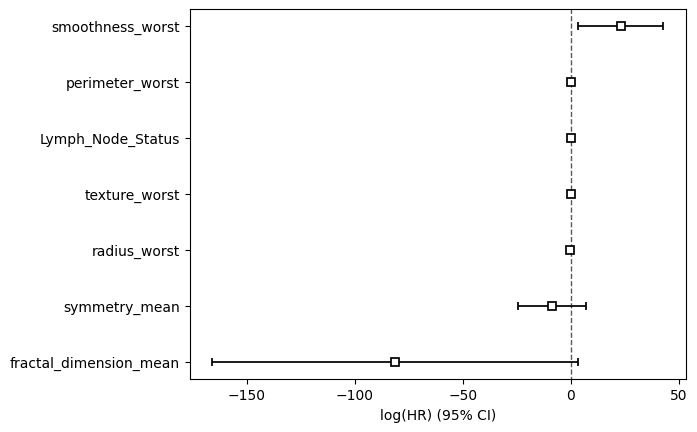

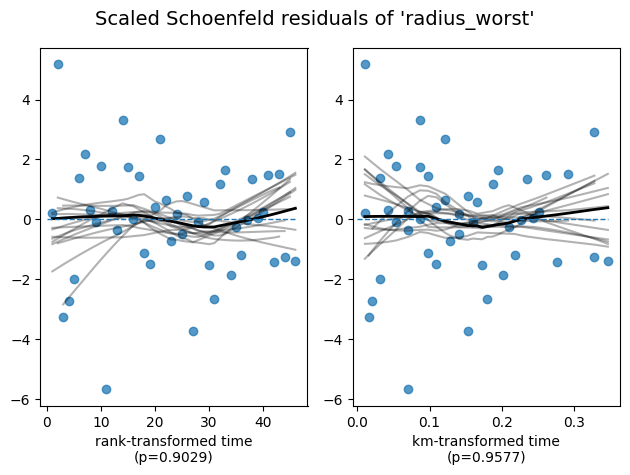

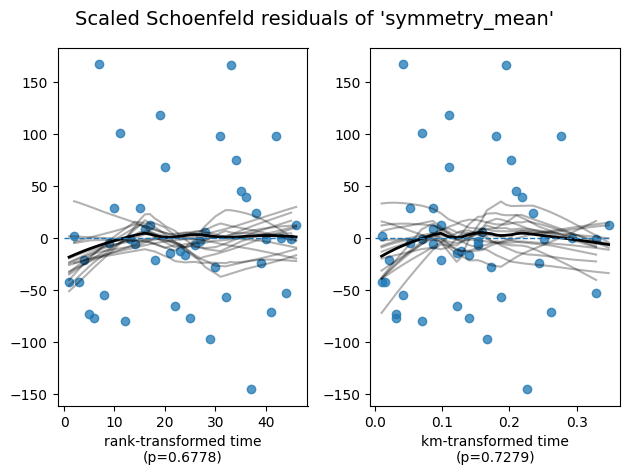

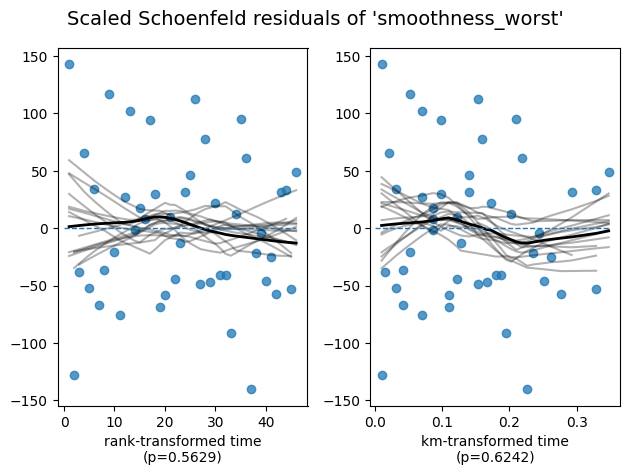

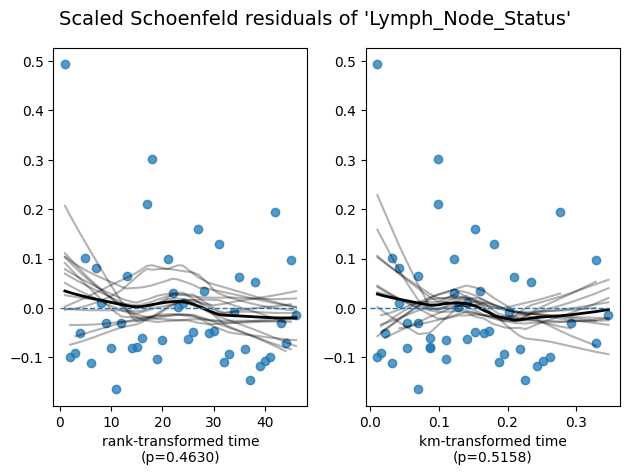

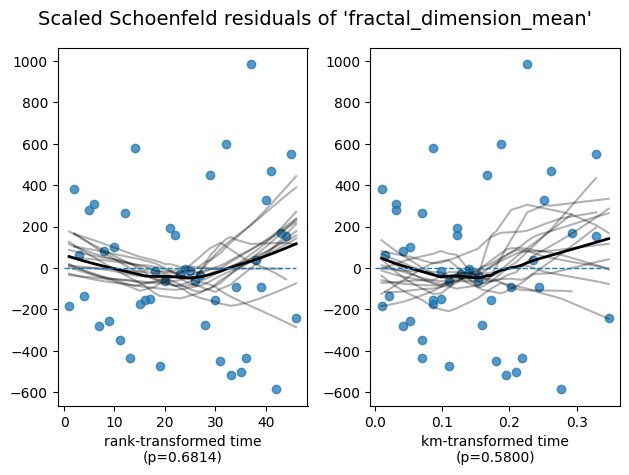

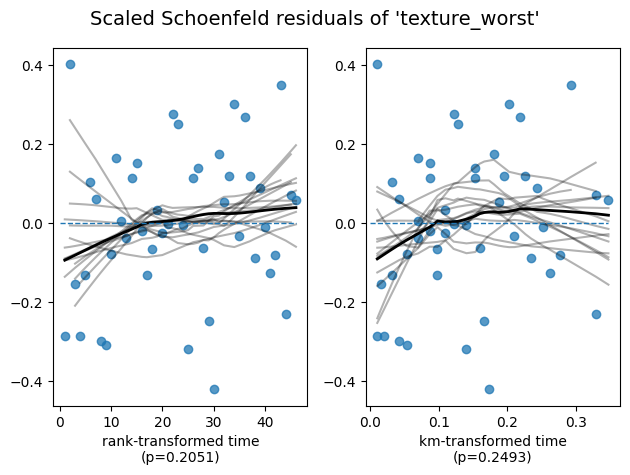

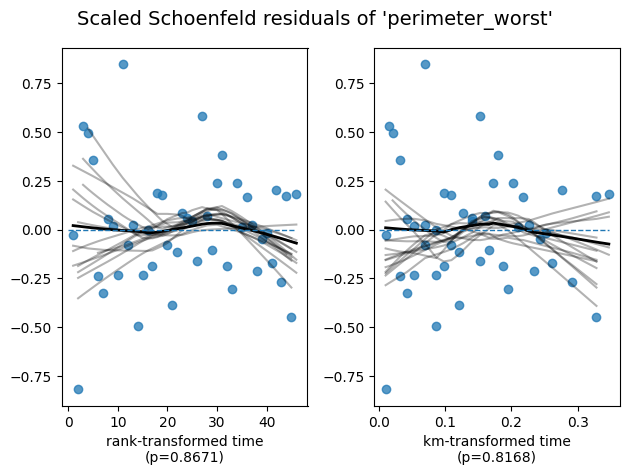

In [12]:
# we define a function to calculate the c-index
def calculate_cindex(data, features):
    train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)
    cph = CoxPHFitter()
    cph.fit(train_data[features + ["Time", "event"]], duration_col="Time", event_col="event")
    test_pred = cph.predict_partial_hazard(test_data[features])
    return concordance_index(test_data["Time"], -test_pred, test_data["event"])

# Initializing the variables
all_features = list(data.columns)
all_features.remove("Time")
all_features.remove("event")
selected_features = []
remaining_features = all_features.copy()
best_cindex = 0

# Performing forward feature selection
while remaining_features:
    cindices = []
    for feature in remaining_features:
        current_features = selected_features + [feature]
        cindex = calculate_cindex(data, current_features)
        cindices.append((feature, cindex))
    
    # Selecting the best feature based on c-index
    best_feature, best_feature_cindex = max(cindices, key=lambda x: x[1])
    
    # Checking for improvement
    if best_feature_cindex > best_cindex:
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        best_cindex = best_feature_cindex
        print(f"Selected feature: {best_feature}, C-index: {best_cindex}")
    else:
        # if there is no improvement in the model stop
        break

print("Selected features:", selected_features)

# fitting the final model with selected features
cph = CoxPHFitter()
cph.fit(data[selected_features + ["Time", "event"]], duration_col="Time", event_col="event")
cph.print_summary(decimals=3)
cph.plot()
cph.check_assumptions(data[selected_features + ["Time", "event"]], p_value_threshold=0.05,show_plots=True)
plt.show()
